#### Auth - Drive authenticate

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#### Import


In [ ]:
import requests, pandas as pd, numpy as np
from requests import session
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
from matplotlib.pyplot import figure
from collections import Counter
import matplotlib.font_manager as fm
from google.colab import files
from matplotlib.ticker import FormatStrFormatter

#### Read data

In [ ]:
# 2012_in two-sample
stats_2012_in = gc.open_by_key('1duvehwpb506mSnr6SnJ5iVzvXTwlAzKDp8l-IDnQLUk')
ks_2012 = stats_2012_in.worksheet('ks')
data = ks_2012.get_all_values()
df_stats_2012_in = pd.DataFrame(data)
df_stats_2012_in = df_stats_2012_in.rename(columns=df_stats_2012_in.iloc[0]).drop(df_stats_2012_in.index[0])
df_stats_2012_in["w"]=df_stats_2012_in["w"].str.replace(',','.')
df_stats_2012_in[["w"]] = df_stats_2012_in[["w"]].apply(pd.to_numeric)
df_stats_2012_in[["ks_random_statistic"]] = df_stats_2012_in[["ks_random_statistic"]].apply(pd.to_numeric)
df_stats_2012_in[["ks_scalefree_statistic"]] = df_stats_2012_in[["ks_scalefree_statistic"]].apply(pd.to_numeric)
df_stats_2012_in[["ks_random_pvalue"]] = df_stats_2012_in[["ks_random_pvalue"]].apply(pd.to_numeric)
df_stats_2012_in[["ks_scalefree_pvalue"]] = df_stats_2012_in[["ks_scalefree_pvalue"]].apply(pd.to_numeric)
df_stats_2012_in[["nodes"]] = df_stats_2012_in[["nodes"]].apply(pd.to_numeric)
df_stats_2012_in[["edges"]] = df_stats_2012_in[["edges"]].apply(pd.to_numeric)

In [ ]:
# 2012_out two-sample
stats_2012_out = gc.open_by_key('1tXishoaXa4x3Q0NtBu2VG7To5fHFy6QYah3oqTXrVRI')
ks_2012 = stats_2012_out.worksheet('ks')
data = ks_2012.get_all_values()
df_stats_2012_out = pd.DataFrame(data)
df_stats_2012_out= df_stats_2012_out.rename(columns=df_stats_2012_out.iloc[0]).drop(df_stats_2012_out.index[0])
df_stats_2012_out["w"]=df_stats_2012_out["w"].str.replace(',','.')
df_stats_2012_out[["w"]] = df_stats_2012_out[["w"]].apply(pd.to_numeric)
df_stats_2012_out[["ks_random_statistic"]] = df_stats_2012_out[["ks_random_statistic"]].apply(pd.to_numeric)
df_stats_2012_out[["ks_scalefree_statistic"]] = df_stats_2012_out[["ks_scalefree_statistic"]].apply(pd.to_numeric)
df_stats_2012_out[["ks_random_pvalue"]] = df_stats_2012_out[["ks_random_pvalue"]].apply(pd.to_numeric)
df_stats_2012_out[["ks_scalefree_pvalue"]] = df_stats_2012_out[["ks_scalefree_pvalue"]].apply(pd.to_numeric)
df_stats_2012_out[["nodes"]] = df_stats_2012_out[["nodes"]].apply(pd.to_numeric)
df_stats_2012_out[["edges"]] = df_stats_2012_out[["edges"]].apply(pd.to_numeric)

In [ ]:
# 2007_in two-sample
stats_2007_in = gc.open_by_key('1z3yya39BXZuyKikSsF4FzVZnuqKPwuXey8TQTpnGbh0')
ks_2007 = stats_2007_in.worksheet('ks')
data = ks_2007.get_all_values()
df_stats_2007_in = pd.DataFrame(data)
df_stats_2007_in = df_stats_2007_in.rename(columns=df_stats_2007_in.iloc[0]).drop(df_stats_2007_in.index[0])
df_stats_2007_in["w"]=df_stats_2007_in["w"].str.replace(',','.')
df_stats_2007_in[["w"]] = df_stats_2007_in[["w"]].apply(pd.to_numeric)
df_stats_2007_in[["ks_random_statistic"]] = df_stats_2007_in[["ks_random_statistic"]].apply(pd.to_numeric)
df_stats_2007_in[["ks_scalefree_statistic"]] = df_stats_2007_in[["ks_scalefree_statistic"]].apply(pd.to_numeric)
df_stats_2007_in[["ks_random_pvalue"]] = df_stats_2007_in[["ks_random_pvalue"]].apply(pd.to_numeric)
df_stats_2007_in[["ks_scalefree_pvalue"]] = df_stats_2007_in[["ks_scalefree_pvalue"]].apply(pd.to_numeric)
df_stats_2007_in[["nodes"]] = df_stats_2007_in[["nodes"]].apply(pd.to_numeric)
df_stats_2007_in[["edges"]] = df_stats_2007_in[["edges"]].apply(pd.to_numeric)

In [ ]:
# 2007_out two-sample
stats_2007_out = gc.open_by_key('15q7qktebfX55LigsikT79yqLG2jb3hcWnyigNeKT8_A')
ks_2007 = stats_2007_out.worksheet('ks')
data = ks_2007.get_all_values()
df_stats_2007_out = pd.DataFrame(data)
df_stats_2007_out= df_stats_2007_out.rename(columns=df_stats_2007_out.iloc[0]).drop(df_stats_2007_out.index[0])
df_stats_2007_out["w"]=df_stats_2007_out["w"].str.replace(',','.')
df_stats_2007_out[["w"]] = df_stats_2007_out[["w"]].apply(pd.to_numeric)
df_stats_2007_out[["ks_random_statistic"]] = df_stats_2007_out[["ks_random_statistic"]].apply(pd.to_numeric)
df_stats_2007_out[["ks_scalefree_statistic"]] = df_stats_2007_out[["ks_scalefree_statistic"]].apply(pd.to_numeric)
df_stats_2007_out[["ks_random_pvalue"]] = df_stats_2007_out[["ks_random_pvalue"]].apply(pd.to_numeric)
df_stats_2007_out[["ks_scalefree_pvalue"]] = df_stats_2007_out[["ks_scalefree_pvalue"]].apply(pd.to_numeric)
df_stats_2007_out[["nodes"]] = df_stats_2007_out[["nodes"]].apply(pd.to_numeric)
df_stats_2007_out[["edges"]] = df_stats_2007_out[["edges"]].apply(pd.to_numeric)

## Scatterplots

#### 2012 In-degree

In [ ]:
df_stats_2012_in = df_stats_2012_in[df_stats_2012_in['w'] < 0.151]

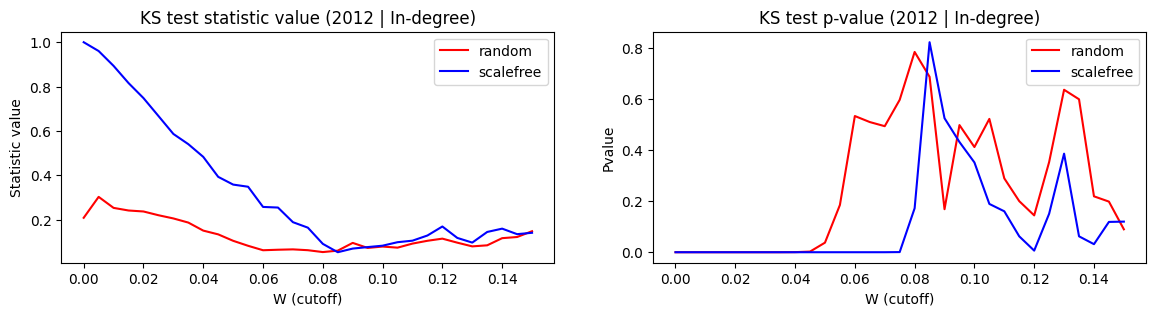

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

w = df_stats_2012_in['w']

#statistic values
ax1.plot(w, df_stats_2012_in['ks_random_statistic'], 'r')
ax1.plot(w, df_stats_2012_in['ks_scalefree_statistic'], 'b')
ax1.legend(["random", "scalefree"])
ax1.set_title('KS test statistic value (2012 | In-degree)')
ax1.set(xlabel="W (cutoff)", ylabel="Statistic value")

#pvalue
ax2.plot(w, df_stats_2012_in['ks_random_pvalue'], 'r')
ax2.plot(w, df_stats_2012_in['ks_scalefree_pvalue'], 'b')
ax2.legend(["random", "scalefree"])
ax2.set_title('KS test p-value (2012 | In-degree)')
ax2.set(xlabel="W (cutoff)", ylabel="Pvalue")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

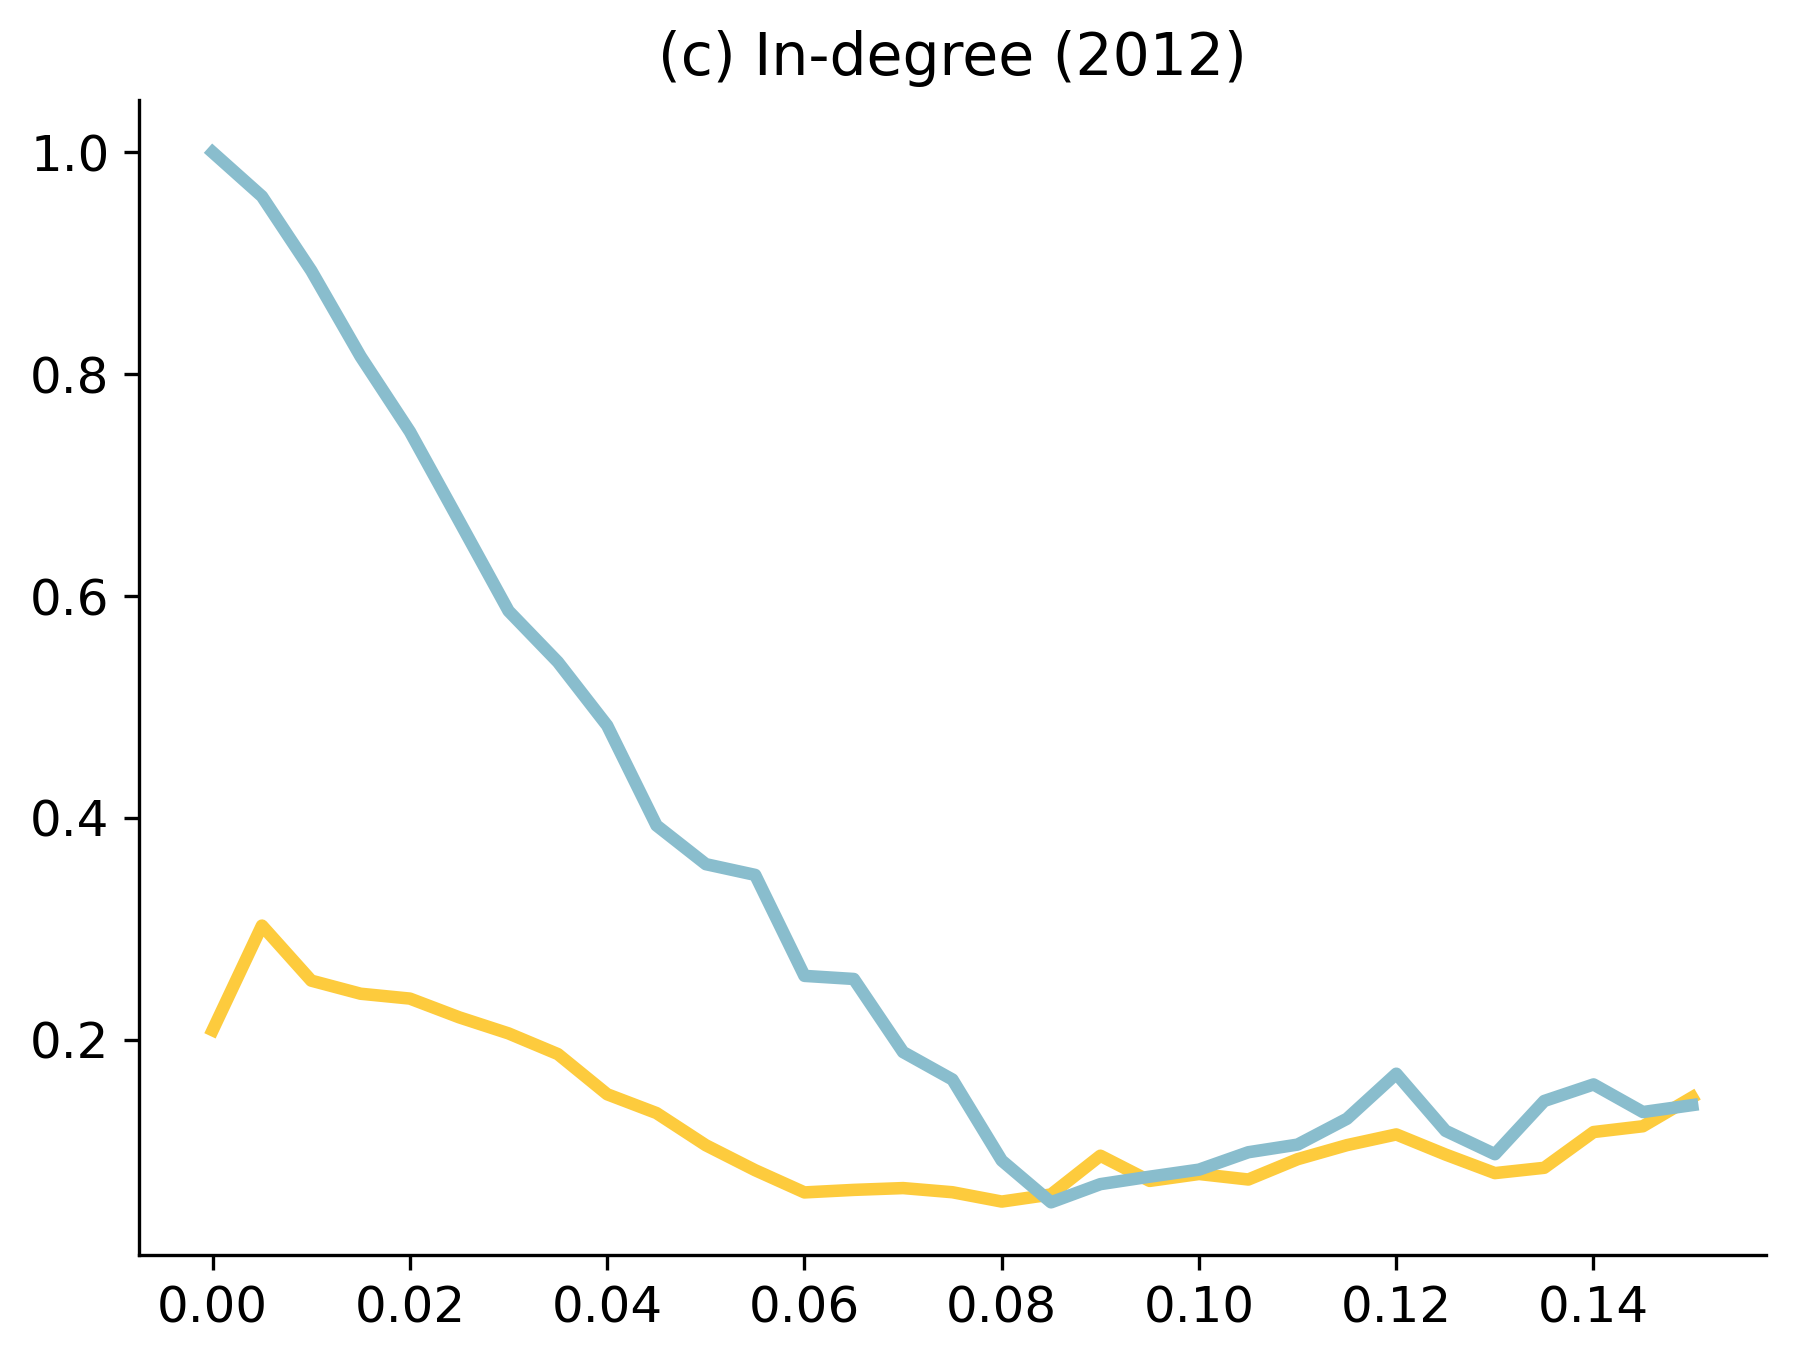

In [ ]:
w = df_stats_2012_in['w']

plt.figure(figsize=(7, 5), dpi=300)

#statistic values
plt.plot(w, df_stats_2012_in['ks_random_statistic'], '#FDCB3D', linewidth=3)
plt.plot(w, df_stats_2012_in['ks_scalefree_statistic'], '#89BDCD', linewidth=3)

plt.title('(c) In-degree (2012)', size=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig('2012-in.png', dpi=1200)
files.download('2012-in.png')

#### 2012 Out-degree

In [ ]:
df_stats_2012_out = df_stats_2012_out[df_stats_2012_out['w'] < 0.151]

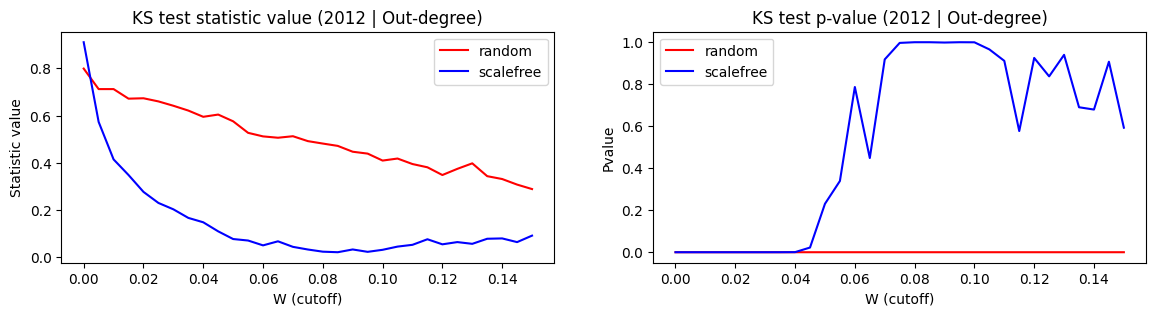

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

w = df_stats_2012_out['w']

#statistic values
ax1.plot(w, df_stats_2012_out['ks_random_statistic'], 'r')
ax1.plot(w, df_stats_2012_out['ks_scalefree_statistic'], 'b')
ax1.legend(["random", "scalefree"])
ax1.set_title('KS test statistic value (2012 | Out-degree)')
ax1.set(xlabel="W (cutoff)", ylabel="Statistic value")

#pvalue
ax2.plot(w, df_stats_2012_out['ks_random_pvalue'], 'r')
ax2.plot(w, df_stats_2012_out['ks_scalefree_pvalue'], 'b')
ax2.legend(["random", "scalefree"])
ax2.set_title('KS test p-value (2012 | Out-degree)')
ax2.set(xlabel="W (cutoff)", ylabel="Pvalue")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

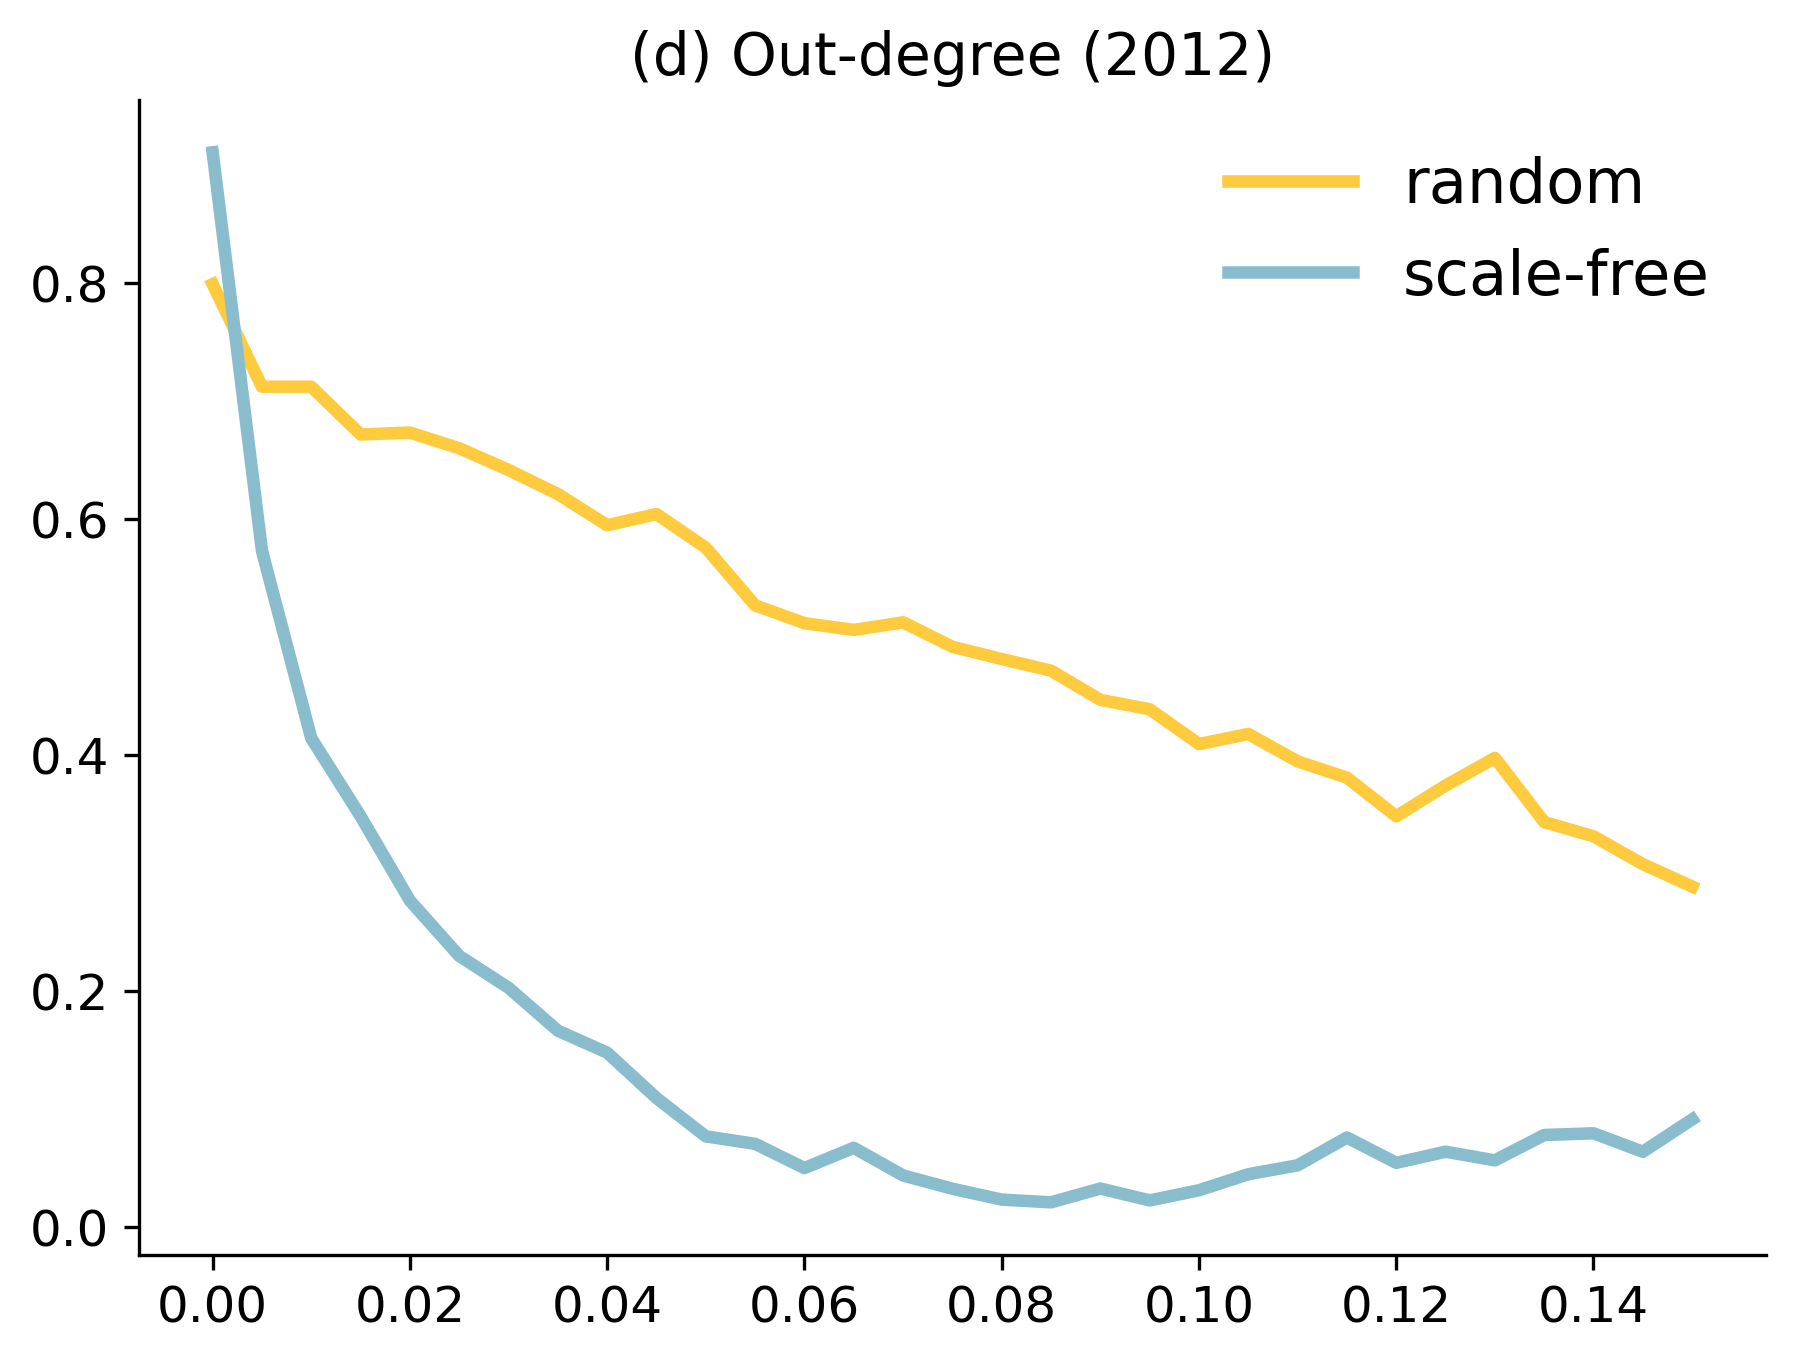

In [ ]:
w = df_stats_2012_out['w']

plt.figure(figsize=(7, 5), dpi=300)
plt.rcParams["font.family"] = "sans"

#statistic values
plt.plot(w, df_stats_2012_out['ks_random_statistic'], '#FDCB3D', linewidth=3)
plt.plot(w, df_stats_2012_out['ks_scalefree_statistic'], '#89BDCD', linewidth=3)
plt.legend(["random", "scale-free"], prop={'size': 15}, frameon=False)
plt.title('(d) Out-degree (2012)', size=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig('2012-out.png', dpi=1200)
files.download('2012-out.png')

#### 2007 In-degree

In [ ]:
df_stats_2007_in = df_stats_2007_in[df_stats_2007_in['w'] < 0.151]

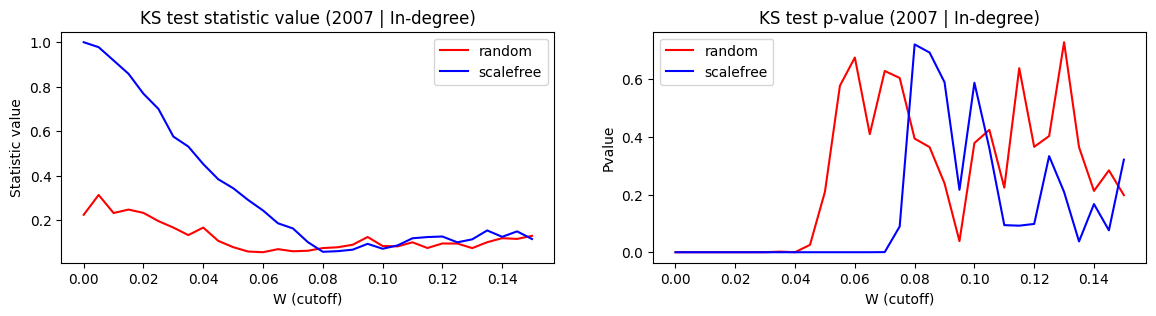

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

w = df_stats_2007_in['w']

#statistic values
ax1.plot(w, df_stats_2007_in['ks_random_statistic'], 'r')
ax1.plot(w, df_stats_2007_in['ks_scalefree_statistic'], 'b')
ax1.legend(["random", "scalefree"])
ax1.set_title('KS test statistic value (2007 | In-degree)')
ax1.set(xlabel="W (cutoff)", ylabel="Statistic value")

#pvalue
ax2.plot(w, df_stats_2007_in['ks_random_pvalue'], 'r')
ax2.plot(w, df_stats_2007_in['ks_scalefree_pvalue'], 'b')
ax2.legend(["random", "scalefree"])
ax2.set_title('KS test p-value (2007 | In-degree)')
ax2.set(xlabel="W (cutoff)", ylabel="Pvalue")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

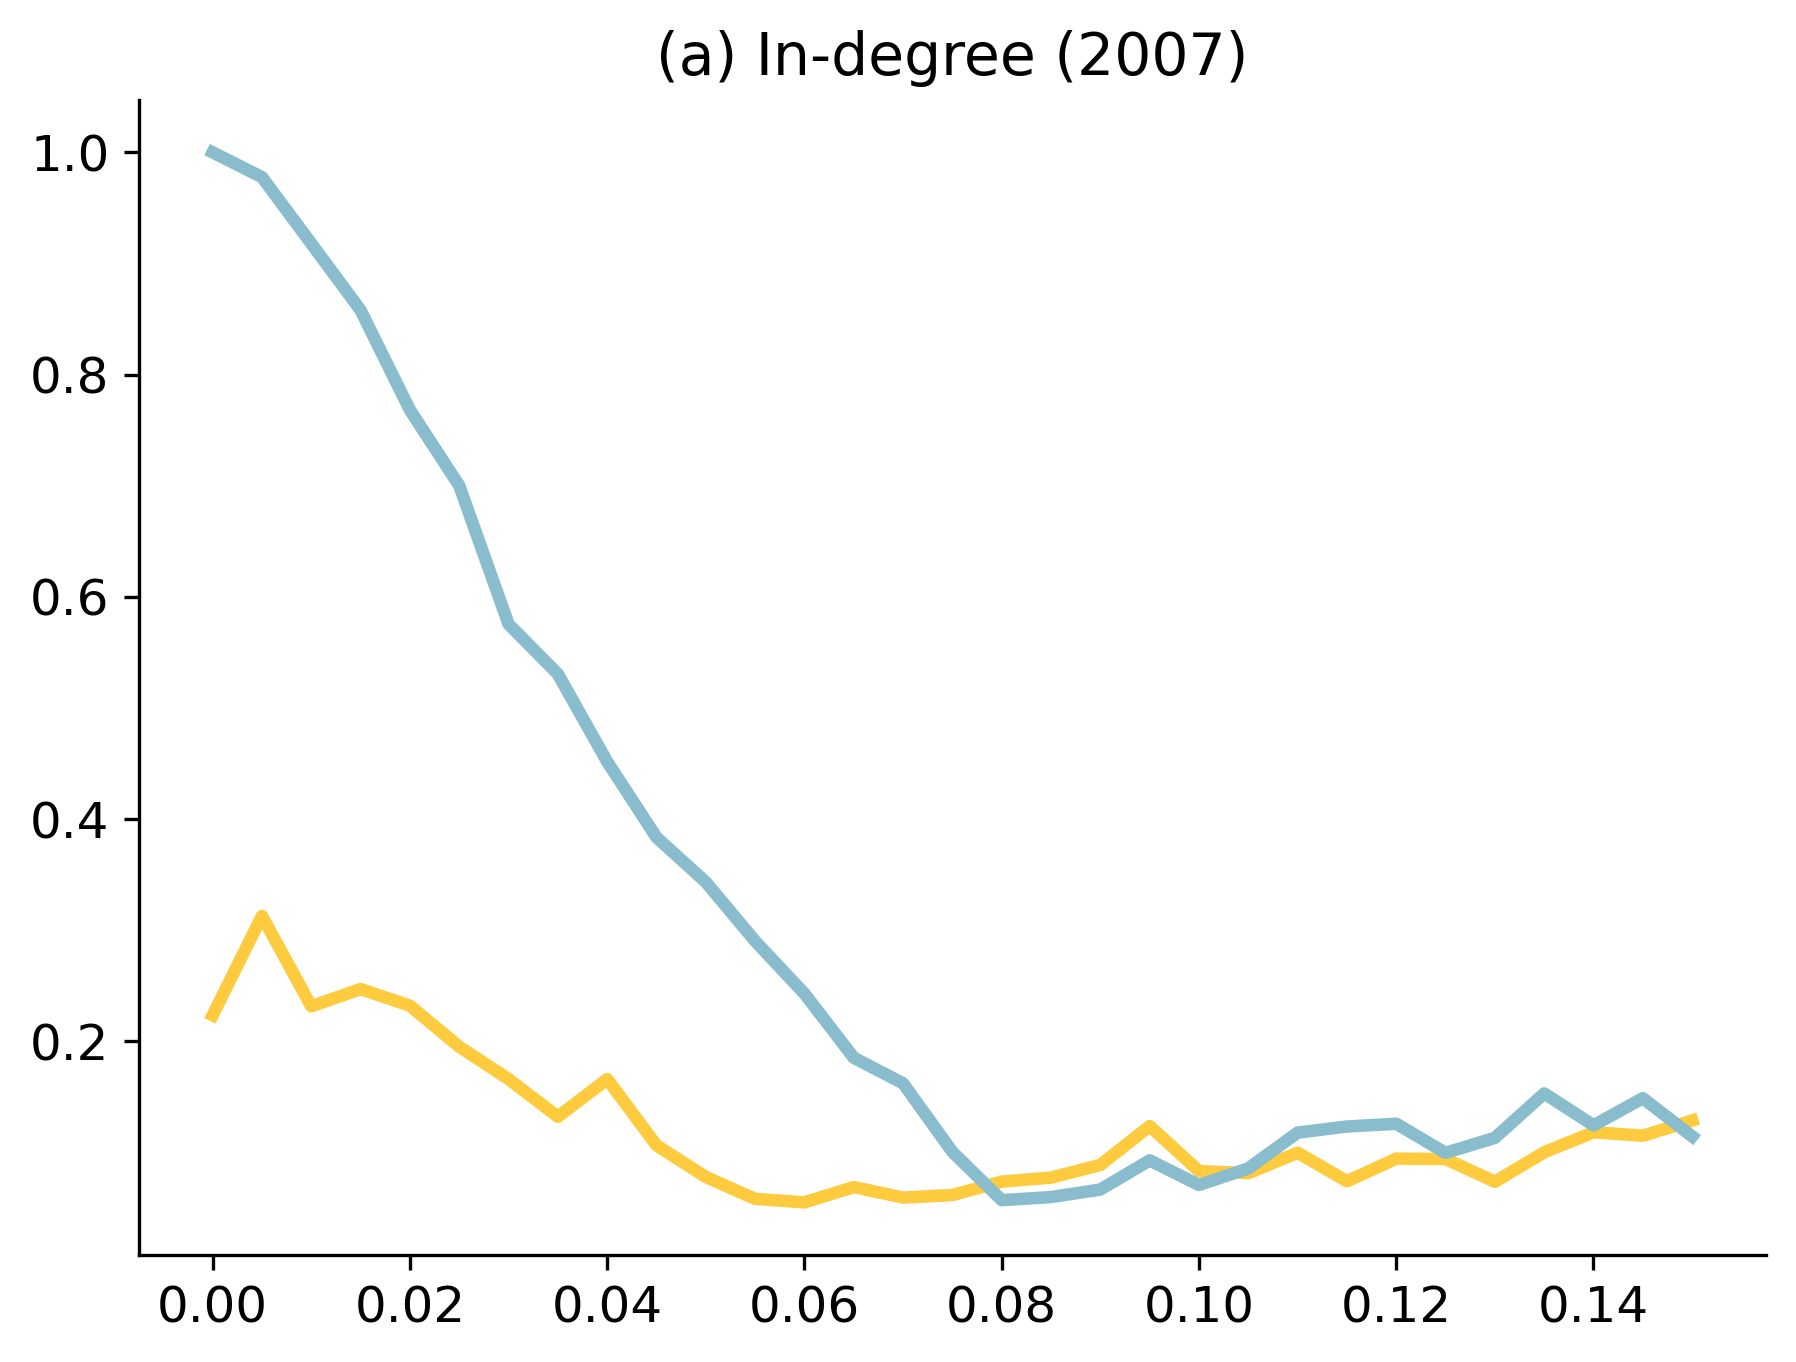

In [ ]:
w = df_stats_2007_in['w']


plt.figure(figsize=(7, 5), dpi=300)
plt.rcParams["font.family"] = "sans"

#statistic values
plt.plot(w, df_stats_2007_in['ks_random_statistic'], '#FDCB3D', linewidth=3)
plt.plot(w, df_stats_2007_in['ks_scalefree_statistic'], '#89BDCD', linewidth=3)

plt.title('(a) In-degree (2007)', size=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig('2007-in.png', dpi=1200)
files.download('2007-in.png')

#### 2007 Out-degree

In [ ]:
df_stats_2007_out = df_stats_2007_out[df_stats_2007_out['w'] < 0.151]

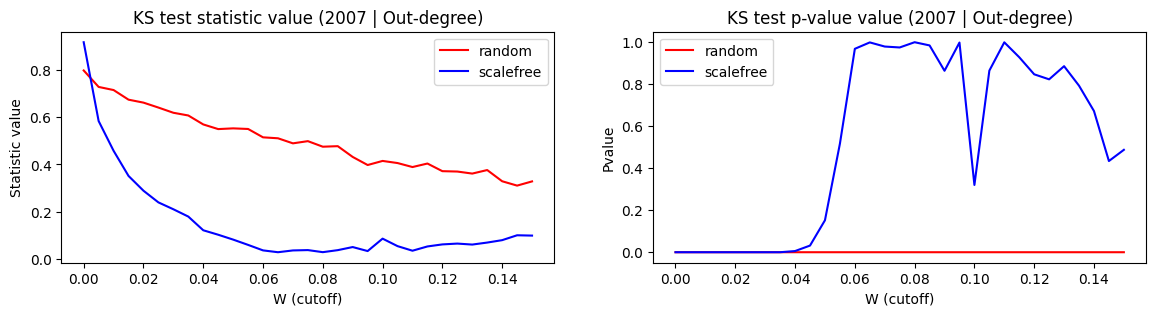

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 3))

w = df_stats_2007_out['w']

#statistic values
ax1.plot(w, df_stats_2007_out['ks_random_statistic'], 'r')
ax1.plot(w, df_stats_2007_out['ks_scalefree_statistic'], 'b')
ax1.legend(["random", "scalefree"])
ax1.set_title('KS test statistic value (2007 | Out-degree)')
ax1.set(xlabel="W (cutoff)", ylabel="Statistic value")

#pvalue
ax2.plot(w, df_stats_2007_out['ks_random_pvalue'], 'r')
ax2.plot(w, df_stats_2007_out['ks_scalefree_pvalue'], 'b')
ax2.legend(["random", "scalefree"])
ax2.set_title('KS test p-value value (2007 | Out-degree)')
ax2.set(xlabel="W (cutoff)", ylabel="Pvalue")

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

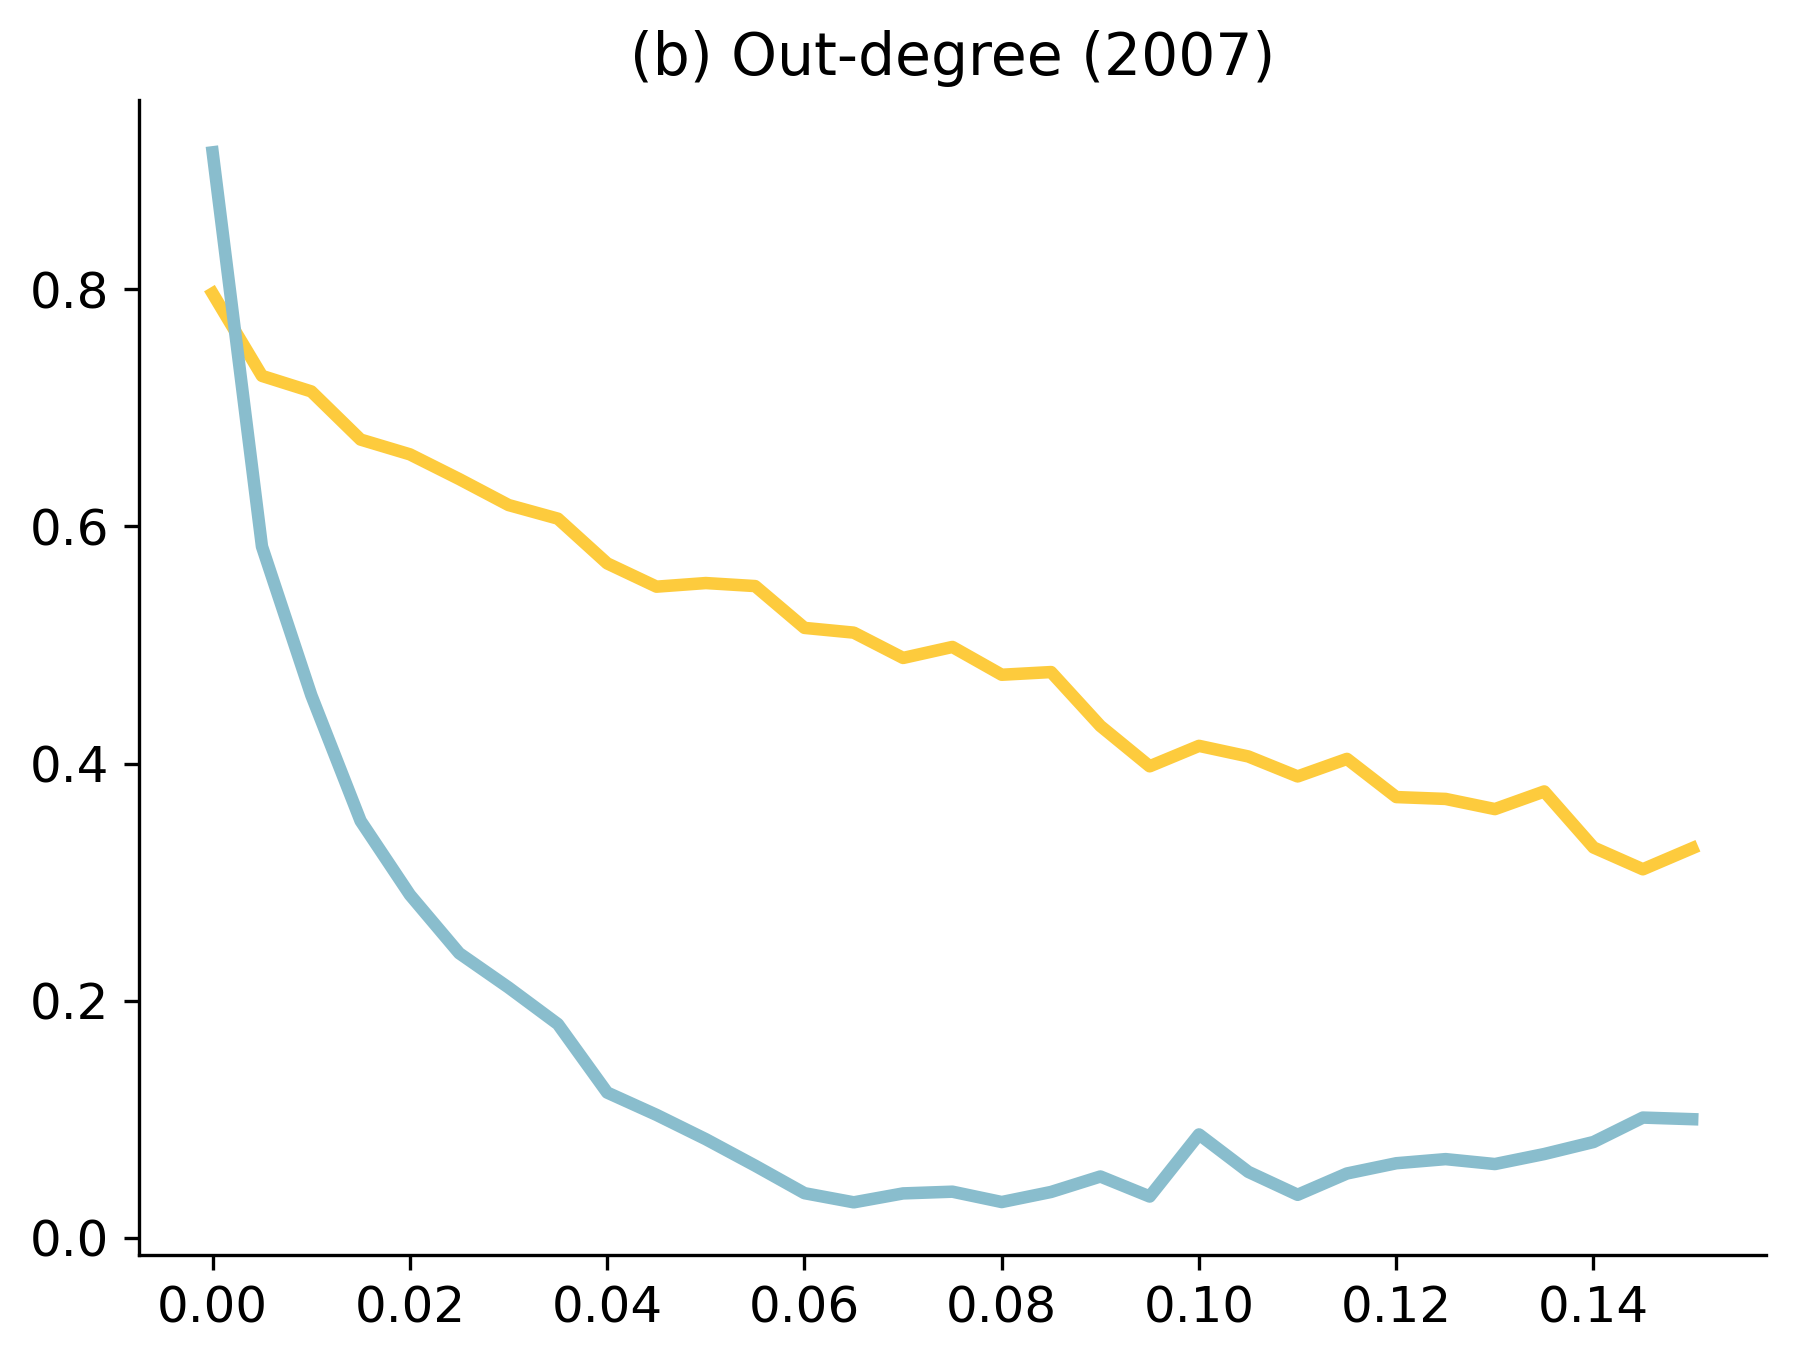

In [ ]:
w = df_stats_2007_out['w']

plt.figure(figsize=(7, 5), dpi=300)
plt.rcParams["font.family"] = "sans"

#statistic values
plt.plot(w, df_stats_2007_out['ks_random_statistic'], '#FDCB3D', linewidth=3)
plt.plot(w, df_stats_2007_out['ks_scalefree_statistic'], '#89BDCD', linewidth=3)

plt.title('(b) Out-degree (2007)', size=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig('2007-out.png', dpi=1200)
files.download('2007-out.png')